# Introduction to Neural Networks

## What is a Neural Network?

A neural network is a computational model that was inspired by the functionality  of biological neurons. It consists of layers of interconnected units called **neurons**, which process input data to produce an output. Neural networks (NN) are a type of non-parametric method. Non-parametric approaches do not assume any shape for $f$. Instead, the try to estimate $f$ (using $\hat{f}$) that gets as close to the data points as possible. 

```{important}
Neural networks are not models of the brain as there is no proven evidence that the brain operates the same way neural networks learn representations. However, some of the concepts were inspired by understanding the brain.
```

### Basic Structure of a Neural Network

Every NN consists of three distinct layers;

- **Input Layer**: The layer that receives the input data (e.g., features like temperature and snow depth).
- **Hidden Layers**: Layers where the data is processed. Each layer extracts different features or patterns from the data.
- **Output Layer**: The final layer that produces the prediction or classification (e.g., predicted snow density).

Neural networks can vary in complexity, from simple single-layer networks to deep networks with many hidden layers. Here is an image of a sample neural network:

```{figure} ./images/feedforward.png
---
alt: A Feed-forward Neural Network
width: 400px
name: ffn
---
A Simple Feed-forward Neural Network
```


### A Perceptron or Single Neuron

To understand the functioning of these layers, we begin by exploring the building blocks of neural networks; a single neuron or perceptron. Each layer in a NN consists of small individual units called neurons (usually represented with a circle). A neuron receives inputs from other neurons, performs some mathematical operations, and then produces an output. Each neuron in the input layer represents a  feature. In essence, the number of neurons in the input layer equals the number of features. Each neuron in the input layer is connected to some or every neuron in the hidden layer. The number of neurons in the hidden layer is not fixed, it is problem dependent and it is often determined via hyperparameter optimization (more on this later). Every inter-neuron connection has an associated weight, these weights are what the neural network learns during the training process.

```{figure} ./images/perceptron.png
---
alt: A Perceptron
width: 400px
name: perceptron
---
A Single Neuron
```

#### How the perceptron works

Consider a dataset $\mathcal{D}_n = \left\lbrace (\textbf{x}_1, y_1), (\textbf{x}_2, y_2), \cdots, (\textbf{x}_n, y_n) \right\rbrace$ where $\textbf{x}_i^\top \equiv ({x}_{i1}, {x}_{i2}, \cdots, {x}_{ik})$ denotes the $k$-dimensional vector of features, and $y_i$ represents the corresponding outcome. Given a set of input fed into the network through the input layer, the output of a neuron in the hidden layer is

$$
 z = f(\textbf{x}_i;\textbf{w}) = g(w_0 + \textbf{w}^\top \textbf{x}_i),
$$

where $\textbf{w} = (w_1, w_2, \cdots, w_k)^\top$ is a vector of weights and  $w_0$ is the bias term associated with the neuron. The weights can be thought of as the slopes in a linear regression and the bias as the intercept. The function $g(\cdot)$ is known as the activation function and it is  used to introduce non-linearity into the network. There exists a number of activation functions in practice (see them [here](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)), the commonly used ones are:

- **ReLU (Rectified Linear Unit)**: Outputs the input directly if positive, otherwise, it outputs zero. It’s simple and effective, making it the default choice for most hidden layers.
- **Sigmoid**: Squashes the input to a range between 0 and 1, often used in the output layer of a binary classification problem and in hidden layers.
- **Tanh**: Similar to Sigmoid but outputs between -1 and 1, often used in hidden layers.

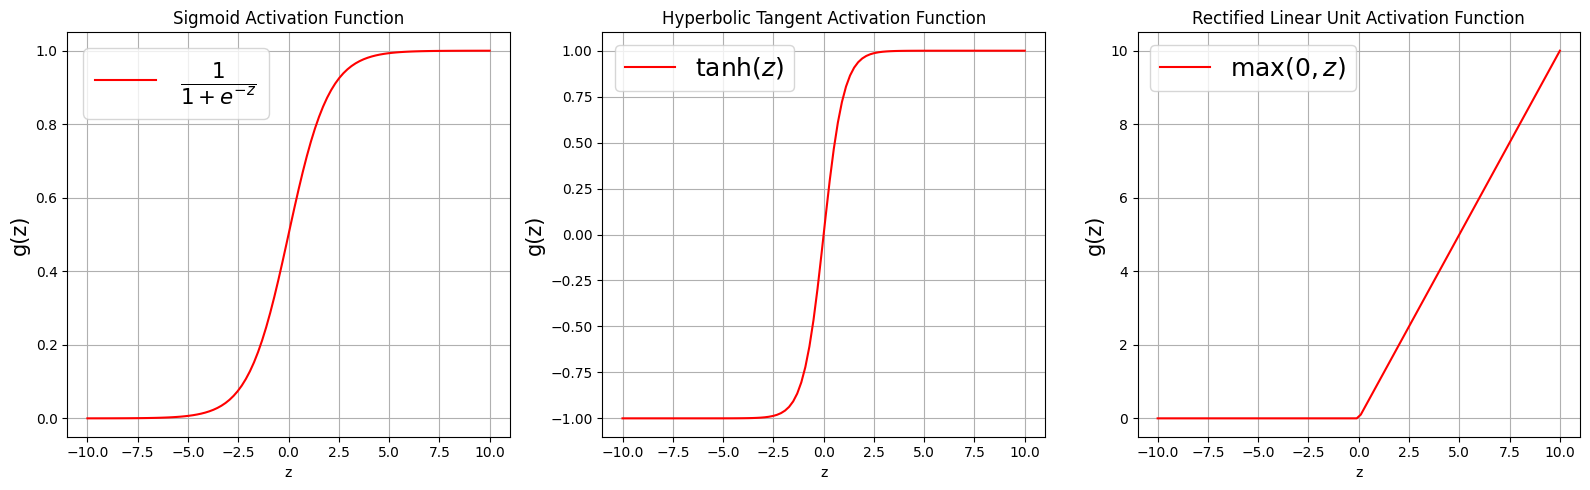

In [3]:
from utils import plot_activations # Import the function to plot the activations

plot_activations()

### Common Neural Network Architectures

- **Feedforward Networks**: Often used for structural data, these networks consist of layers of neurons where the data moves forward from the input to the output without cycles.

- **Convolutional Neural Networks (CNNs)**: The gold standard for image analysis, including, image classification, object detection, and image segmentation. 1D CNN can also be used for sequence data, such as text and time series.

- **Recurrent Neural Networks (RNNs)**: Well-suited for sequence data such as texts, time series, and even tasks like drawing generation. Variants include LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Units) which address the vanishing gradient problem.

- **Encoder-Decoders**: Commonly used for tasks like machine translation, where the input data is encoded into a context vector and then decoded into the target language or format.

- **Generative Adversarial Networks (GANs)**: Used for generating realistic data, including 3D modeling for video games, animation, and generating high-quality images. GANs consist of two networks (a generator and a discriminator) that compete against each other.

- **Graph Neural Networks (GNNs)**: These networks are designed to work with graph data structures, making them suitable for tasks like social network analysis, molecular structure analysis, and recommendation systems.

- **Transformers**: A revolutionary architecture primarily used in NLP but increasingly in other areas like vision (Vision Transformers). Transformers rely on self-attention mechanisms to process input data in parallel, making them highly efficient for tasks like language modeling, translation, and more. Transformers are the backbone of models like OPenAI's GPT, Google's BERT, Google's Gemini, and others.

## Training a Feedforward Neural Network

Training a neural network involves adjusting the weights based on the errors made on the training data.

### Forward Propagation
In forward propagation, the input data passes through the network, layer by layer, to produce an output. The output is then compared to the actual target using a **loss function**.

### Loss Function
The loss function quantifies how far the network's predictions are from the actual targets. For regression tasks, a common loss function is Mean Squared Error (MSE). See others [here](https://pytorch.org/docs/stable/nn.html#loss-functions).

### Backward Propagation and Gradient Descent
- **Backward Propagation**: Computes the gradient of the loss function with respect to each weight using the chain rule. This gradient indicates the direction to adjust the weights to minimize the loss.
- **Gradient Descent**: An optimization algorithm that adjusts the weights in the direction that minimizes the loss function. This process is repeated over many iterations to improve the model's accuracy. The algorithm is as follows:
    1. Initialize weights and biases with random numbers.
    2. Loop until convergence:
        1. Compute the gradient using backpropagation ($\widehat{\mathcal{L}}_n(\textbf{w})$ is the loss function); $\frac{\partial \widehat{\mathcal{R}}_n(\textbf{w})}{\partial \textbf{w}}$
        2. Updated weights; $\textbf{w} \leftarrow  \textbf{w} - \eta  \frac{\partial \widehat{\mathcal{R}}_n(\textbf{w})}{\partial \textbf{w}}$
    3. Return the weights

```{note}
In practice we do not go through the entire dataset before updating the weight as this might be computationally expensive. So, we update the weight in batches. This is called mini-batch gradient descent. When the batch size is 1, it is called stochastic gradient descent. Additionally, we often use optimizers to extend the ideas of gradient descent to improve the efficiency, stability, and convergence of the training process.

You can think of an optimizer as gradient descent plus some additional optimization techniques that improve or modify the basic gradient descent process.
```
